## Assignment 3
### Name: Barun Parua
### Roll Number: 21CS10014

In [190]:
# all imports

# random module is used to generate random numbers
# matplotlib is used to plot the graph
# numpy is used to perform numerical operations
# defaultdict is used to create a dictionary with default values
# math is used to perform mathematical operations
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import math

# fetch_ucirepo is used to fetch the data from the UCI repository
from ucimlrepo import fetch_ucirepo

# sklearn imports

# train_test_split is used to split the data into train and test
# accuracy_score, precision_score, recall_score, f1_score are used to calculate the accuracy, precision, recall and f1 score respectively
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# GaussianNB is used to implement the Gaussian Naive Bayes algorithm for the 3rd part
from sklearn.naive_bayes import GaussianNB

# roc_curve and auc are used to plot the ROC curve and calculate the area under the curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# SVC is used to implement the Support Vector Classifier for comparison with the Naive Bayes algorithm
from sklearn.svm import SVC

In [191]:
# Function to assign probabilities to the faces of the die
def assign_probabilities(k):
    probs = []
    probs.append(1/(2**(k-1)))
    for i in range(2,k+1):
        probs.append(1/(2**(i-1)))
    return probs

# Function to roll the die
def roll_die(k):
    return random.choices(range(1, k + 1), weights=assign_probabilities(k))[0]

# Function to simulate the rolls
def simulate_rolls(k, num_rolls):
    results = [sum(roll_die(k) for _ in range(num_rolls)) for _ in range(1000)]
    return results

# Function to calculate the theoretical expected value
def theoretical_expected_value(k, num_rolls):
    return num_rolls * sum(i * assign_probabilities(k)[i - 1] for i in range(1, k + 1))

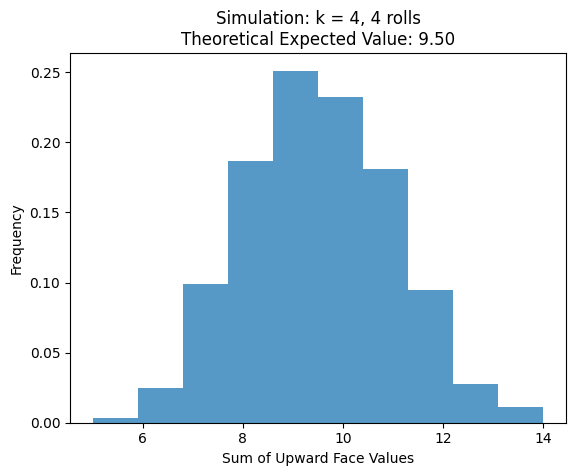

Five-number summary:
Minimum: 5
Q1: 8.0
Median: 9.0
Q3: 11.0
Maximum: 14
Theoretical Expected Value: 9.50
Simulated Expected Value: 9.52


In [192]:
# Perform the simulation for k = 4 and num_rolls = 4
k = 4
num_rolls = 4
results = simulate_rolls(k, num_rolls)
expected_value = theoretical_expected_value(k, num_rolls)

# Plot a histogram
plt.hist(results, bins=10, density=True, alpha=0.75)
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Simulation: k = {k}, {num_rolls} rolls\nTheoretical Expected Value: {expected_value:.2f}')
plt.show()

# Print five-number summary
print("Five-number summary:")
q1, median, q3 = np.percentile(results, [25, 50, 75])
minimum, maximum = min(results), max(results)
print(f"Minimum: {minimum}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Maximum: {maximum}")

# Print the theoretical and simulated expected values
print(f"Theoretical Expected Value: {expected_value:.2f}")
print(f"Simulated Expected Value: {np.mean(results):.2f}")

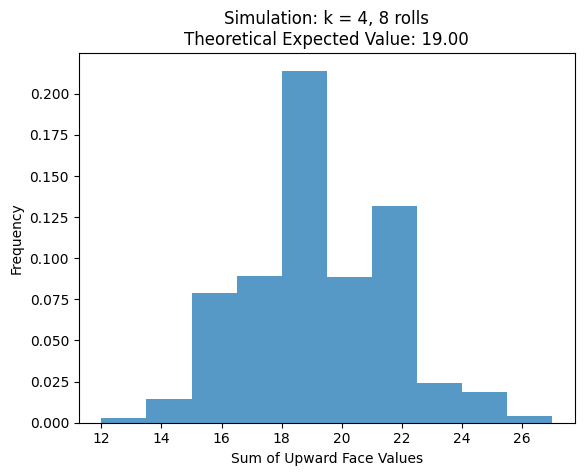

Five-number summary:
Minimum: 12
Q1: 17.0
Median: 19.0
Q3: 21.0
Maximum: 27
Theoretical Expected Value: 19.00
Simulated Expected Value: 18.98


In [193]:
# Perform the simulation for k = 4 and num_rolls = 8
k = 4
num_rolls = 8
results = simulate_rolls(k, num_rolls)
expected_value = theoretical_expected_value(k, num_rolls)

# Plot a histogram
plt.hist(results, bins=10, density=True, alpha=0.75)
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Simulation: k = {k}, {num_rolls} rolls\nTheoretical Expected Value: {expected_value:.2f}')
plt.show()

# Print five-number summary
print("Five-number summary:")
q1, median, q3 = np.percentile(results, [25, 50, 75])
minimum, maximum = min(results), max(results)
print(f"Minimum: {minimum}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Maximum: {maximum}")

# Print the theoretical and simulated expected values
print(f"Theoretical Expected Value: {expected_value:.2f}")
print(f"Simulated Expected Value: {np.mean(results):.2f}")

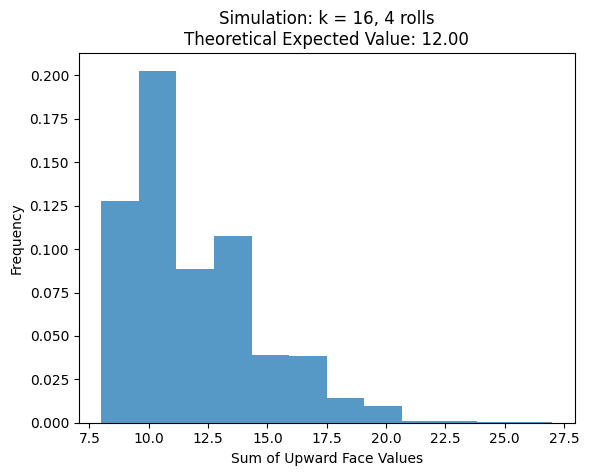

Five-number summary:
Minimum: 8
Q1: 10.0
Median: 11.0
Q3: 13.0
Maximum: 27
Theoretical Expected Value: 12.00
Simulated Expected Value: 11.89


In [194]:
# Perform the simulation for k = 16 and num_rolls = 4
k = 16
num_rolls = 4
results = simulate_rolls(k, num_rolls)
expected_value = theoretical_expected_value(k, num_rolls)

# Plot a histogram
plt.hist(results, bins=12, density=True, alpha=0.75)
plt.xlabel('Sum of Upward Face Values')
plt.ylabel('Frequency')
plt.title(f'Simulation: k = {k}, {num_rolls} rolls\nTheoretical Expected Value: {expected_value:.2f}')
plt.show()

# Print five-number summary
print("Five-number summary:")
q1, median, q3 = np.percentile(results, [25, 50, 75])
minimum, maximum = min(results), max(results)
print(f"Minimum: {minimum}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Maximum: {maximum}")

# Print the theoretical and simulated expected values
print(f"Theoretical Expected Value: {expected_value:.2f}")
print(f"Simulated Expected Value: {np.mean(results):.2f}")

In [195]:
# Load the dataset
spambase = fetch_ucirepo(id=94)

# data as pandas dataframe
X = spambase.data.features
y = spambase.data.targets

# convert to numpy array
X = np.array(X)
y = np.array(y)

# split the data into train and validation and test in 70:15:15 ratio
# validation data is not used in this part
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.82, random_state=42)

# make the data in ND array form
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
# X_val = np.array(X_val)
# y_val = np.array(y_val)

# change shape of y_train and y_test and y_val
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
# y_val = y_val.reshape(-1)

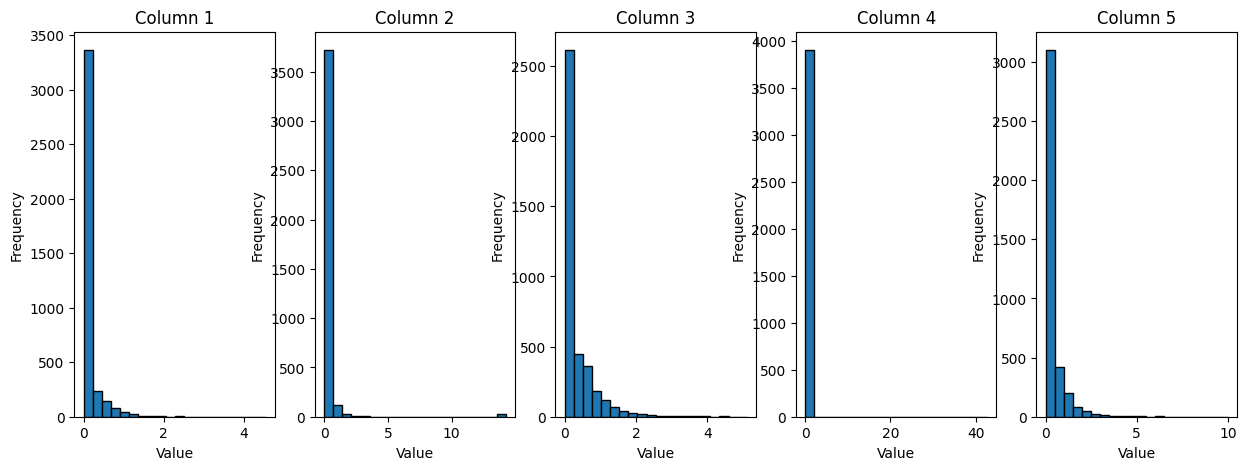

In [196]:
# Step 3: Plot Distribution - Choose 5 columns and plot their probability distributions
# choose the first 5 columns for demonstration

columns_to_plot = X_train[:, :5]

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.hist(columns_to_plot[:, i], bins=20, edgecolor='k')
    plt.title(f'Column {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.show()

In [197]:
# Step 4: Calculate and print the priors of classes
# Priors are the probabilities of each class in the training data
# The dataset has two classes: 0 (non-spam) and 1 (spam)
prior_0 = np.mean(y_train == 0)
prior_1 = np.mean(y_train == 1)
print(f'P(class=0) = {prior_0:.4f}')
print(f'P(class=1) = {prior_1:.4f}')

P(class=0) = 0.6141
P(class=1) = 0.3859


In [198]:
# Step 5: Implement Naive Bayes algorithm from scratch
class NaiveBayesClassifier:
    def __init__(self):
        self.class_priors = {}
        self.feature_probabilities = defaultdict(list)

    def fit(self, X, y):
        # Calculate class priors
        total_samples = len(y)
        self.class_priors[0] = np.mean(y == 0)
        self.class_priors[1] = np.mean(y == 1)

        # Calculate feature probabilities for each class
        for c in [0, 1]:
            X_c = X[y == c]
            for feature in range(X.shape[1]):
                self.feature_probabilities[(c, feature)] = (X_c[:, feature].mean(), X_c[:, feature].std())

    def predict(self, X):
        predictions = []
        for sample in X:
            class_scores = {0: math.log(self.class_priors[0]), 1: math.log(self.class_priors[1])}
            for c in [0, 1]:
                for feature in range(X.shape[1]):
                    mean, std = self.feature_probabilities[(c, feature)]
                    class_scores[c] += -0.5 * ((sample[feature] - mean) / std) ** 2 - math.log(std)
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions

# Create and train the Naive Bayes model
naive_bayes = NaiveBayesClassifier()
naive_bayes.fit(X_train, y_train)

In [199]:
# Step 6: Prediction and Evaluation
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, precision, recall, f1

# Evaluate the model
accuracy, precision, recall, f1 = evaluate_model(naive_bayes, X_test, y_test)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8278
Precision: 0.7390
Recall: 0.9408
F1 Score: 0.8278


In [200]:
# Step 7: Apply log transformation to all columns of the dataset and retrain the Naive Bayes model
X_train_log = np.log1p(X_train)  # Adding 1 before taking the log to avoid division by zero
X_test_log = np.log1p(X_test)

naive_bayes_log = NaiveBayesClassifier()
naive_bayes_log.fit(X_train_log, y_train)

# Evaluation on the log-transformed dataset
accuracy_log, precision_log, recall_log, f1_log = evaluate_model(naive_bayes_log, X_test_log, y_test)
print(f'Accuracy (Log Transformed): {accuracy_log:.4f}')
print(f'Precision (Log Transformed): {precision_log:.4f}')
print(f'Recall (Log Transformed): {recall_log:.4f}')
print(f'F1 Score (Log Transformed): {f1_log:.4f}')

Accuracy (Log Transformed): 0.8495
Precision (Log Transformed): 0.7688
Recall (Log Transformed): 0.9408
F1 Score (Log Transformed): 0.8462


In [201]:
# Create and train the Gaussian Naive Bayes model
naive_bayes_sklearn = GaussianNB()
naive_bayes_sklearn.fit(X_train, y_train)

GaussianNB()

In [202]:
# Create and train the Gaussian Naive Bayes model on log-transformed data
naive_bayes_log_sklearn = GaussianNB()
naive_bayes_log_sklearn.fit(X_train_log, y_train)

GaussianNB()

In [203]:
# Get accuracy, precision, recall, and F1 score for the sklearn model
accuracy_sklearn, precision_sklearn, recall_sklearn, f1_sklearn = evaluate_model(naive_bayes_sklearn, X_test, y_test)
print(f'Accuracy (Sklearn): {accuracy_sklearn:.4f}')
print(f'Precision (Sklearn): {precision_sklearn:.4f}')
print(f'Recall (Sklearn): {recall_sklearn:.4f}')
print(f'F1 Score (Sklearn): {f1_sklearn:.4f}')
print()

# Get accuracy, precision, recall, and F1 score for the sklearn model on log-transformed data
accuracy_log_sklearn, precision_log_sklearn, recall_log_sklearn, f1_log_sklearn = evaluate_model(naive_bayes_log_sklearn, X_test_log, y_test)
print(f'Accuracy (Sklearn, Log Transformed): {accuracy_log_sklearn:.4f}')
print(f'Precision (Sklearn, Log Transformed): {precision_log_sklearn:.4f}')
print(f'Recall (Sklearn, Log Transformed): {recall_log_sklearn:.4f}')
print(f'F1 Score (Sklearn, Log Transformed): {f1_log_sklearn:.4f}')

Accuracy (Sklearn): 0.8292
Precision (Sklearn): 0.7409
Recall (Sklearn): 0.9408
F1 Score (Sklearn): 0.8290

Accuracy (Sklearn, Log Transformed): 0.8495
Precision (Sklearn, Log Transformed): 0.7688
Recall (Sklearn, Log Transformed): 0.9408
F1 Score (Sklearn, Log Transformed): 0.8462


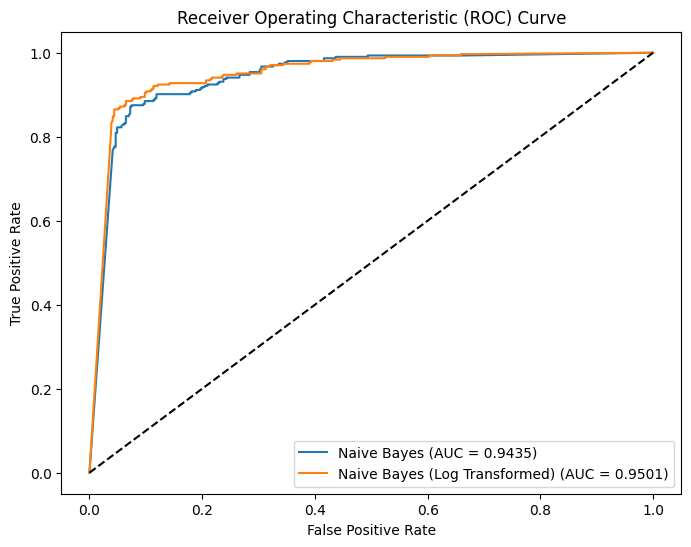

In [204]:
# Predict probabilities for the test data using both models
probs = naive_bayes_sklearn.predict_proba(X_test)[:, 1]
probs_log = naive_bayes_log_sklearn.predict_proba(X_test_log)[:, 1]

# Calculate ROC curve for both models
fpr, tpr, _ = roc_curve(y_test, probs)
fpr_log, tpr_log, _ = roc_curve(y_test, probs_log)

# Calculate AUC for both models
auc_score = auc(fpr, tpr)
auc_score_log = auc(fpr_log, tpr_log)

# Plot ROC curve for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc_score:.4f})')
plt.plot(fpr_log, tpr_log, label=f'Naive Bayes (Log Transformed) (AUC = {auc_score_log:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [205]:
# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate the SVM model and print the accuracy, precision, recall, and F1 score
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(svm_model, X_test, y_test)
print(f'Accuracy (SVM): {svm_accuracy:.4f}')
print(f'Precision (SVM): {svm_precision:.4f}')
print(f'Recall (SVM): {svm_recall:.4f}')
print(f'F1 Score (SVM): {svm_f1:.4f}')

Accuracy (SVM): 0.9247
Precision (SVM): 0.9468
Recall (SVM): 0.8783
F1 Score (SVM): 0.9113
